In [214]:
print('Im working')

Im working


In [215]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
# Imports for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage  
from sklearn import preprocessing

In [216]:
# Defining all methods
# method to sample a dataset (hardcoded seed for randomized selection, see alternatives in comment)
def get_sample_from_dataset(dataset):
    # randomly define sample from dataset
    # good seeds to try: 13, 42, 1123, 5813, 213455
    np.random.seed(seed=42)
    # We are going to use bootstrapping
    sample_proportion =  0.05
    dataset_size = len(dataset)
    sample_size = sample_proportion * dataset_size
    print("The sample size we are going to use will be: "+ str(sample_size))
    # Run bootstrap
    chosen_idx = np.random.choice(dataset_size, replace=False, size=int(sample_size))
    sampled_dataset =  dataset.iloc[chosen_idx]
    print("The new shape of the sampled dataset is: " + str(sampled_dataset.values.shape))
    return sampled_dataset

# method to calculate mean, median, range, iqr, variance and std
# or just mean and std. all_values:Boolean defines that
def calc_descriptive(data, all_values):
    data_mean = np.mean(data)
    data_std = np.std(data)
    if all_values:
        data_median = np.median(data)
        data_range = np.ptp(data)
        data_iqr = stats.iqr(data)
        data_variance = np.var(data)
        return data_mean, data_median, data_range, data_iqr, data_variance, data_std    
    return data_mean, data_std

# method to calculate descriptive statistical information about given data & sample
def descr_analysis(data,sample,axis):
    data_mean, data_median, data_range, data_iqr, data_variance, data_std = calc_descriptive(data, True)    
    sample_mean, sample_median, sample_range, sample_iqr, sample_variance, sample_std = calc_descriptive(sample, True)    
    print('DESCRIPTIVE STATISTICS FOR ' + axis + ' AXIS')
    print("Mean of dataset is {} || Mean of sample is {}".format(data_mean, sample_mean))
    print("Median of dataset is {} || Median of sample is {}".format(data_median, sample_median))
    print("Range of dataset is {} || Range of sample is {}".format(data_range, sample_range))
    print("Interquartile range of dataset is {} || Interquartile range of sample is {}".format(data_iqr, sample_iqr))
    print("Variance of dataset is {} || Variance of sample is {}".format(data_variance, sample_variance))
    print("Standard deviation of dataset is {} || Standard deviation of sample is {}".format(data_std, sample_std))    
    plt.figure()
    sns.distplot(data, hist=False, kde=True, 
             hist_kws={'edgecolor':'blue'},
             kde_kws={'linewidth': 4},
             label = ''
            )
    sns.distplot(sample, hist=False, kde=True, 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 2},
             label = ''
            )
    plt.legend(('data','sample'),prop={'size': 10}, title = 'Feature ' + axis)

# method for custom scale calculation
def scale_sample_custom(data):
    x_mean, x_std = calc_descriptive(data, False)
    sample = get_sample_from_dataset(data)
    sample_scaled = [(j-x_mean)/x_std for j in sample]
    return sample_scaled

In [217]:
# Read the dataset
df3 = pd.read_csv("data/data3.csv")
df6 = pd.read_csv("data/data6.csv")

In [218]:
# scale both datasets
df6_scaled = preprocessing.scale(df6)
df3_scaled = preprocessing.scale(df3)

# spliting standardised dataset into individual feature arrays
# 6-dimensional dataset
x_vals_6d = (df6_scaled[:,0])
y_vals_6d = (df6_scaled[:,1])
z_vals_6d = (df6_scaled[:,2])
u_vals_6d = (df6_scaled[:,3])
v_vals_6d = (df6_scaled[:,4])
w_vals_6d = (df6_scaled[:,5])
# 3-dimensional dataset
x_vals_3d = (df3_scaled[:,0])
y_vals_3d = (df3_scaled[:,1])
z_vals_3d = (df3_scaled[:,2])

# generate standardized samples of the individual dataset features from original dataset
# 6-dimensional dataset
sample_x_vals_6d = scale_sample_custom(df6['V1'])
sample_y_vals_6d = scale_sample_custom(df6['V2'])
sample_z_vals_6d = scale_sample_custom(df6['V3'])
sample_u_vals_6d = scale_sample_custom(df6['V4'])
sample_v_vals_6d = scale_sample_custom(df6['V5'])
sample_w_vals_6d = scale_sample_custom(df6['V6'])
# 3-dimensional dataset
sample_x_vals_3d = scale_sample_custom(df3['V1'])
sample_y_vals_3d = scale_sample_custom(df3['V2'])
sample_z_vals_3d = scale_sample_custom(df3['V3'])

The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000,)
The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000,)
The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000,)
The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000,)
The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000,)
The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000,)
The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000,)
The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000,)
The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000,)


DESCRIPTIVE STATISTICS FOR x AXIS
Mean of dataset is -2.1268912557085667e-17 || Mean of sample is -0.005454996538062564
Median of dataset is 0.005966280607063569 || Median of sample is 0.0034254252250908415
Range of dataset is 23.012924829499532 || Range of sample is 9.842539232687656
Interquartile range of dataset is 0.9516687929651968 || Interquartile range of sample is 0.9662985508819963
Variance of dataset is 0.9999999999999998 || Variance of sample is 1.0095628324796166
Standard deviation of dataset is 0.9999999999999999 || Standard deviation of sample is 1.0047700396009112
DESCRIPTIVE STATISTICS FOR y AXIS
Mean of dataset is 1.3760844315887273e-17 || Mean of sample is -0.013437331257914423
Median of dataset is -0.001222112785364638 || Median of sample is -0.01371534800327736
Range of dataset is 14.691943022118302 || Range of sample is 11.37031985091166
Interquartile range of dataset is 0.9315864155578678 || Interquartile range of sample is 0.9458377579304659
Variance of dataset i

C:\Users\Panagiotis\Miniconda2\envs\Python_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



Mean of dataset is 3.410605131648481e-18 || Mean of sample is -0.0070359731251137675
Median of dataset is -0.00762570112896196 || Median of sample is -0.010855664951277154
Range of dataset is 23.036000991722958 || Range of sample is 14.8388098978632
Interquartile range of dataset is 0.7875747921223548 || Interquartile range of sample is 0.8092135549031224
Variance of dataset is 0.9999999999999997 || Variance of sample is 1.0012837105774373
Standard deviation of dataset is 0.9999999999999998 || Standard deviation of sample is 1.000641649431722
DESCRIPTIVE STATISTICS FOR u AXIS
Mean of dataset is -1.7953046456871865e-17 || Mean of sample is 0.0018227759874937354
Median of dataset is 0.003614568286637705 || Median of sample is 0.0063496839273836005
Range of dataset is 8.555496702690782 || Range of sample is 7.830254734650809
Interquartile range of dataset is 1.2309518332177074 || Interquartile range of sample is 1.2079226123660214
Variance of dataset is 0.9999999999999994 || Variance of 

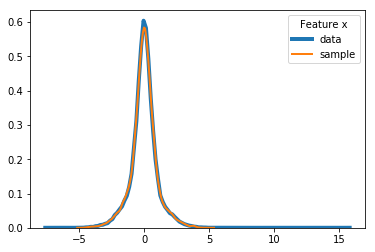

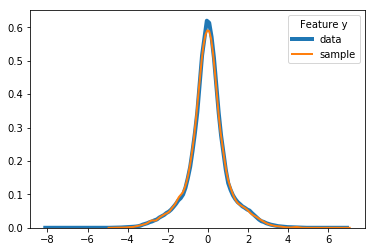

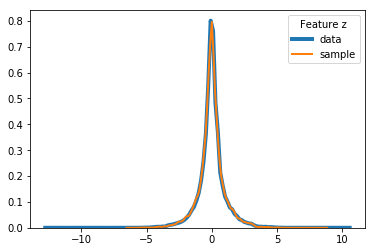

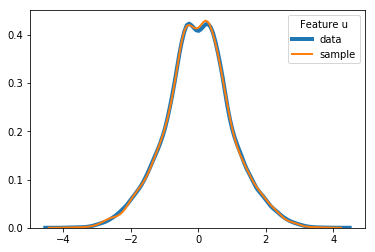

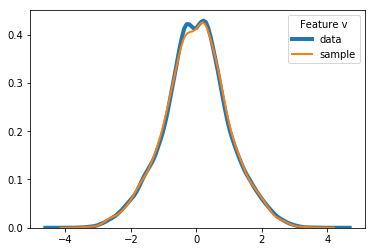

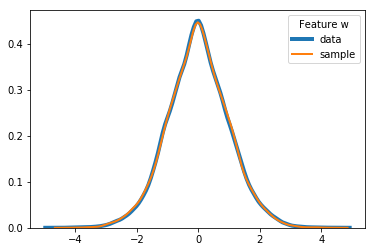

In [219]:
descr_analysis(x_vals_6d, sample_x_vals_6d, 'x')
descr_analysis(y_vals_6d, sample_y_vals_6d,  'y')
descr_analysis(z_vals_6d, sample_z_vals_6d,  'z')
descr_analysis(u_vals_6d, sample_u_vals_6d,  'u')
descr_analysis(v_vals_6d, sample_v_vals_6d,  'v')
descr_analysis(w_vals_6d, sample_w_vals_6d,  'w')

DESCRIPTIVE STATISTICS FOR x AXIS
Mean of dataset is 3.655979223064302e-16 || Mean of sample is 0.001386921338867431
Median of dataset is -0.06121192389479124 || Median of sample is -0.052165784561625295
Range of dataset is 9.707712960900597 || Range of sample is 5.623497558289609
Interquartile range of dataset is 1.4683779732092233 || Interquartile range of sample is 1.4466077368372559
Variance of dataset is 1.0000000000000002 || Variance of sample is 0.9974803804026972
Standard deviation of dataset is 1.0 || Standard deviation of sample is 0.998739395639672
DESCRIPTIVE STATISTICS FOR y AXIS
Mean of dataset is -5.1632772131900615e-17 || Mean of sample is -0.005675008561313795
Median of dataset is -0.27562430827313616 || Median of sample is -0.27161055881701796
Range of dataset is 5.720090871154314 || Range of sample is 5.489197993122212
Interquartile range of dataset is 1.2009670944474893 || Interquartile range of sample is 1.1779702141810813
Variance of dataset is 1.0000000000000002 

C:\Users\Panagiotis\Miniconda2\envs\Python_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


DESCRIPTIVE STATISTICS FOR z AXIS
Mean of dataset is -1.9895196601282805e-17 || Mean of sample is 0.006134133570226568
Median of dataset is -0.2220016046594686 || Median of sample is -0.22003548817994806
Range of dataset is 6.213189516958977 || Range of sample is 6.091699033433128
Interquartile range of dataset is 1.2142985753445572 || Interquartile range of sample is 1.2214451728686115
Variance of dataset is 1.0 || Variance of sample is 0.986832954617684
Standard deviation of dataset is 1.0 || Standard deviation of sample is 0.9933946620642191


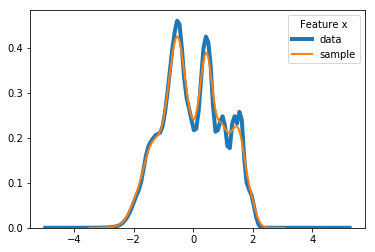

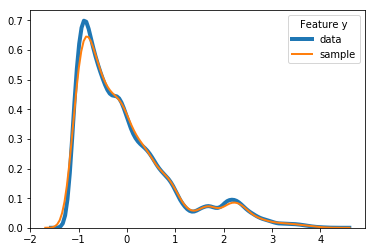

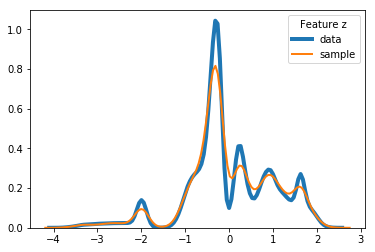

In [220]:
descr_analysis(x_vals_3d, sample_x_vals_3d, 'x')
descr_analysis(y_vals_3d, sample_y_vals_3d,  'y')
descr_analysis(z_vals_3d, sample_z_vals_3d,  'z')

scaled dataset variance of f3 and f6
scaled sample variance of f3 and f6
comparison of variance (abs)

(scale)
    PCA 3->2 AND 6->2
    scaterplots
Sampling
    num of samples
    clustering
    hopkin's